In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
use_cuda = torch.cuda.is_available()
device   = torch.device("cuda" if use_cuda else "cpu")
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

c:\Pytorchenv\TorchEnv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_path = r"C:\Users\Vansh\Desktop\projects\Maverick\Wild fire\train"
test_path = r"C:\Users\Vansh\Desktop\projects\Maverick\Wild fire\test"
valid_path = r"C:\Users\Vansh\Desktop\projects\Maverick\Wild fire\valid"
wildfire='wildfire'
nowildfire="nowildfire"

In [3]:


for i in os.listdir(train_path):
    f = os.path.join(train_path, i)
    count = 0
    for j in os.listdir(f):
        count = count +1
    print("the number of samples of training set of "+i+ " is as below:")
    print(count)
for i in os.listdir(test_path):
    f = os.path.join(test_path, i)
    count = 0
    for j in os.listdir(f):
        count = count +1
    print("the number of samples of testing set of "+i+ " is as below:")
    print(count)
for i in os.listdir(valid_path):
    f = os.path.join(valid_path, i)
    count = 0
    for j in os.listdir(f):
        count = count +1
    print("the number of samples of validation set of "+i+ " is as below:")
    print(count)

the number of samples of training set of nowildfire is as below:
14500
the number of samples of training set of wildfire is as below:
15750
the number of samples of testing set of nowildfire is as below:
2820
the number of samples of testing set of wildfire is as below:
3480
the number of samples of validation set of nowildfire is as below:
2820
the number of samples of validation set of wildfire is as below:
3480


In [37]:
from PIL import Image
import os

def find_corrupted_images(directory):
    corrupted_files = []
    for filename in os.listdir(directory):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
            filepath = os.path.join(directory, filename)
            try:
                with Image.open(filepath) as img:
                    img.verify()  # Check if it's an actual image file
            except (IOError, SyntaxError) as e:
                corrupted_files.append(filepath)
    return corrupted_files

directory_path = r'C:\Users\Vansh\Desktop\projects\Maverick\Wild fire\test\wildfire'
corrupted_images = find_corrupted_images(directory_path)
print("Corrupted images:", corrupted_images)

    

Corrupted images: []


In [6]:
num_classes = 2
learning_rate = 1e-4
batch_size = 16
num_epochs = 20

In [7]:
from torch.utils.data import DataLoader
import torch
import torchvision.transforms as transforms
from torchvision import datasets


train_dataset = datasets.ImageFolder(root=train_path, transform=transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),
    #transforms.RandomAdjustSharpness(0.4),
    #transforms.RandomAutocontrast(),
    #transforms.Grayscale(num_output_channels=3),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),  # Normalize to range [-1, 1]
]))

val_dataset = datasets.ImageFolder(root=valid_path, transform=transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),
    #transforms.RandomAdjustSharpness(0.4),
    #transforms.RandomAutocontrast(),
    #transforms.Grayscale(num_output_channels=3),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),  # Normalize to range [-1, 1]
]))
test_dataset = datasets.ImageFolder(root=test_path, transform=transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor(),
    #transforms.RandomAdjustSharpness(0.4),
    #transforms.RandomAutocontrast(),
    #transforms.Grayscale(num_output_channels=3),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),  # Normalize to range [-1, 1]
]))



train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

num_train_images = len(train_loader.dataset)
print(f"Number of images in the training dataloader: {num_train_images}")


num_val_images = len(val_loader.dataset)
print(f"Number of images in the validation dataloader: {num_val_images}")

num_test_images = len(test_loader.dataset)
print(f"Number of images in the testing dataloader: {num_test_images}")


Number of images in the training dataloader: 30250
Number of images in the validation dataloader: 6300
Number of images in the testing dataloader: 6300


In [8]:
import torch.nn as nn
class CustomClassifier(nn.Module):
    def __init__(self, in_features, num_classes=2):
        super(CustomClassifier, self).__init__()
        
        self.fc1_1=nn.Linear(in_features=in_features, out_features=num_classes)
        

    def forward(self, x):
        
        x = self.fc1_1(x)
       
        return x

In [9]:
from torchvision.models import densenet169,  DenseNet169_Weights
model=densenet169(weights=DenseNet169_Weights.IMAGENET1K_V1)


In [10]:
from torchvision.models import densenet169,  DenseNet169_Weights

model=densenet169(weights=DenseNet169_Weights.IMAGENET1K_V1)
# Freeze all layers except the last classification layer
for name, param in model.named_parameters():
    if not name.startswith('classifier'):  # Exclude parameters of the last classification layer
        param.requires_grad = False
# Modify the last classification layer to have 4 output classes
num_ftrs = model.classifier.in_features
model.classifier = CustomClassifier(num_ftrs)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(model)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [11]:
from torchsummary import summary
model_stats = summary(model, (3, 128, 128), verbose=1)
summary_str = str(model_stats)

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 1664, 4, 4]          --
|    └─Conv2d: 2-1                       [-1, 64, 64, 64]          (9,408)
|    └─BatchNorm2d: 2-2                  [-1, 64, 64, 64]          (128)
|    └─ReLU: 2-3                         [-1, 64, 64, 64]          --
|    └─MaxPool2d: 2-4                    [-1, 64, 32, 32]          --
|    └─_DenseBlock: 2-5                  [-1, 256, 32, 32]         --
|    |    └─_DenseLayer: 3-1             [-1, 32, 32, 32]          (45,440)
|    |    └─_DenseLayer: 3-2             [-1, 32, 32, 32]          (49,600)
|    |    └─_DenseLayer: 3-3             [-1, 32, 32, 32]          (53,760)
|    |    └─_DenseLayer: 3-4             [-1, 32, 32, 32]          (57,920)
|    |    └─_DenseLayer: 3-5             [-1, 32, 32, 32]          (62,080)
|    |    └─_DenseLayer: 3-6             [-1, 32, 32, 32]          (66,240)
|    └─_Transition: 2-6                  

In [12]:
from torch.optim import AdamW
from tqdm import tqdm
#from lion_pytorch import Lion
from sklearn.metrics import precision_score, recall_score, f1_score
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [13]:

criterion = nn.CrossEntropyLoss()
optimizer = AdamW(model.parameters(), lr=learning_rate)
#optimizer = Lion(model.parameters(), lr=learning_rate)
# Training loop
#step=0
scheduler = ReduceLROnPlateau(optimizer, 'min',factor=0.01,patience=3)

for epoch in range(num_epochs):
    # Training
    model.train()  # Set model to training mode
    train_loss = 0.0
    correct_train = 0
    
    
    
        

    #Create and save new chcekpoints
    #if epoch % 3 == 0:
    #    checkpoint={'state_dict':model.state_dict(),'optimizer':optimizer.state_dict()}
    #    save_checkpoint(checkpoint)

    for inputs, labels in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
        
        inputs= inputs.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()  # Zero the parameter gradients
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * inputs.size(0)
        
        _, preds = torch.max(outputs, 1)
        correct_train += (preds == labels).sum().item()
        training_acc=float(correct_train)/float(inputs.shape[0])

        #writer.add_scalar('Training Loss', train_loss, global_step=step)
        #writer.add_scalar('Training Accuracy', training_acc, global_step=step)
        #step+=1
        
    train_loss = train_loss / len(train_loader.dataset)
    train_accuracy = correct_train / len(train_loader.dataset) * 100
    
    
    # Validation
    model.eval()
    val_loss = 0.0
    correct_val = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in tqdm(val_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
            inputs= inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)

            _, preds = torch.max(outputs, 1)
            correct_val += (preds == labels).sum().item()

        # Collect predictions and labels for later evaluation
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calculate metrics
    val_loss = val_loss / len(val_loader.dataset)
    val_accuracy = correct_val / len(val_loader.dataset) * 100

    scheduler.step(val_loss)

    #writer.add_scalar('Validation Loss', val_loss, epoch)
    #writer.add_scalar('Validation Accuracy', val_accuracy, epoch)

    precision = precision_score(all_labels, all_preds, average='weighted', zero_division=1)
    recall = recall_score(all_labels, all_preds, average='weighted', zero_division=1)
    f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=1)

    #writer.add_scalar('Precision', precision, epoch)
    #writer.add_scalar('Recall', recall, epoch)
    #writer.add_scalar('F1 Score', f1, epoch)
    
    

    # Print the epoch statistics
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {train_loss:.4f}, Acc: {train_accuracy:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}%')
    print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')
#writer.close()

Epoch 1/20: 100%|██████████| 394/394 [00:23<00:00, 16.76it/s]


Epoch 1/20, Loss: 0.2842, Acc: 89.47%, Val Loss: 0.1693, Val Acc: 94.02%
Precision: 0.9401, Recall: 0.9402, F1 Score: 0.9401


Epoch 2/20: 100%|██████████| 394/394 [00:25<00:00, 15.56it/s]


Epoch 2/20, Loss: 0.2126, Acc: 91.98%, Val Loss: 0.1529, Val Acc: 94.70%
Precision: 0.9472, Recall: 0.9470, F1 Score: 0.9470


Epoch 3/20: 100%|██████████| 394/394 [00:23<00:00, 16.43it/s]


Epoch 3/20, Loss: 0.1966, Acc: 92.57%, Val Loss: 0.1413, Val Acc: 94.83%
Precision: 0.9482, Recall: 0.9483, F1 Score: 0.9482


Epoch 4/20: 100%|██████████| 394/394 [00:22<00:00, 17.20it/s]


Epoch 4/20, Loss: 0.1917, Acc: 92.72%, Val Loss: 0.1505, Val Acc: 94.65%
Precision: 0.9474, Recall: 0.9465, F1 Score: 0.9466


Epoch 5/20: 100%|██████████| 394/394 [00:25<00:00, 15.76it/s]


Epoch 5/20, Loss: 0.1821, Acc: 93.15%, Val Loss: 0.1371, Val Acc: 94.90%
Precision: 0.9492, Recall: 0.9490, F1 Score: 0.9490


Epoch 6/20: 100%|██████████| 394/394 [00:25<00:00, 15.48it/s]


Epoch 6/20, Loss: 0.1807, Acc: 93.10%, Val Loss: 0.1319, Val Acc: 94.92%
Precision: 0.9492, Recall: 0.9492, F1 Score: 0.9492


Epoch 7/20: 100%|██████████| 394/394 [00:26<00:00, 15.15it/s]


Epoch 7/20, Loss: 0.1829, Acc: 92.95%, Val Loss: 0.1296, Val Acc: 95.19%
Precision: 0.9519, Recall: 0.9519, F1 Score: 0.9519


Epoch 8/20: 100%|██████████| 394/394 [00:22<00:00, 17.22it/s]


Epoch 8/20, Loss: 0.1790, Acc: 93.14%, Val Loss: 0.1269, Val Acc: 95.22%
Precision: 0.9522, Recall: 0.9522, F1 Score: 0.9522


Epoch 9/20: 100%|██████████| 394/394 [00:22<00:00, 17.48it/s]


Epoch 9/20, Loss: 0.1737, Acc: 93.23%, Val Loss: 0.1263, Val Acc: 95.32%
Precision: 0.9533, Recall: 0.9532, F1 Score: 0.9532


Epoch 10/20: 100%|██████████| 394/394 [00:23<00:00, 17.00it/s]


Epoch 10/20, Loss: 0.1738, Acc: 93.28%, Val Loss: 0.1368, Val Acc: 95.03%
Precision: 0.9507, Recall: 0.9503, F1 Score: 0.9504


Epoch 11/20: 100%|██████████| 394/394 [00:23<00:00, 17.03it/s]


Epoch 11/20, Loss: 0.1715, Acc: 93.35%, Val Loss: 0.1346, Val Acc: 95.10%
Precision: 0.9513, Recall: 0.9510, F1 Score: 0.9510


Epoch 12/20: 100%|██████████| 394/394 [00:25<00:00, 15.27it/s]


Epoch 12/20, Loss: 0.1741, Acc: 93.31%, Val Loss: 0.1279, Val Acc: 95.21%
Precision: 0.9524, Recall: 0.9521, F1 Score: 0.9521


Epoch 13/20: 100%|██████████| 394/394 [00:22<00:00, 17.18it/s]


Epoch 13/20, Loss: 0.1755, Acc: 93.37%, Val Loss: 0.1461, Val Acc: 94.71%
Precision: 0.9483, Recall: 0.9471, F1 Score: 0.9472


Epoch 14/20: 100%|██████████| 394/394 [00:25<00:00, 15.36it/s]


Epoch 14/20, Loss: 0.1701, Acc: 93.45%, Val Loss: 0.1433, Val Acc: 94.57%
Precision: 0.9457, Recall: 0.9457, F1 Score: 0.9457


Epoch 15/20: 100%|██████████| 394/394 [00:22<00:00, 17.53it/s]


Epoch 15/20, Loss: 0.1675, Acc: 93.74%, Val Loss: 0.1248, Val Acc: 95.10%
Precision: 0.9510, Recall: 0.9510, F1 Score: 0.9509


Epoch 16/20: 100%|██████████| 394/394 [00:23<00:00, 17.02it/s]


Epoch 16/20, Loss: 0.1705, Acc: 93.46%, Val Loss: 0.1290, Val Acc: 95.19%
Precision: 0.9520, Recall: 0.9519, F1 Score: 0.9519


Epoch 17/20: 100%|██████████| 394/394 [00:25<00:00, 15.23it/s]


Epoch 17/20, Loss: 0.1698, Acc: 93.51%, Val Loss: 0.1286, Val Acc: 95.10%
Precision: 0.9510, Recall: 0.9510, F1 Score: 0.9510


Epoch 18/20: 100%|██████████| 394/394 [00:22<00:00, 17.40it/s]


Epoch 18/20, Loss: 0.1713, Acc: 93.52%, Val Loss: 0.1251, Val Acc: 95.14%
Precision: 0.9514, Recall: 0.9514, F1 Score: 0.9514


Epoch 19/20: 100%|██████████| 394/394 [00:25<00:00, 15.23it/s]


Epoch 19/20, Loss: 0.1675, Acc: 93.56%, Val Loss: 0.1319, Val Acc: 95.06%
Precision: 0.9510, Recall: 0.9506, F1 Score: 0.9507


Epoch 20/20: 100%|██████████| 394/394 [00:22<00:00, 17.28it/s]

Epoch 20/20, Loss: 0.1746, Acc: 93.31%, Val Loss: 0.1387, Val Acc: 94.90%
Precision: 0.9497, Recall: 0.9490, F1 Score: 0.9491


In [14]:
for epoch in range(1):
    model.eval()
    test_loss = 0.0
    correct_test= 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in tqdm(test_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
            inputs= inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * inputs.size(0)

            _, preds = torch.max(outputs, 1)
            correct_test += (preds == labels).sum().item()

        # Collect predictions and labels for later evaluation
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calculate metrics
    test_loss = test_loss / len(test_loader.dataset)
    test_accuracy = correct_test / len(test_loader.dataset) * 100

    scheduler.step(test_loss)

    #writer.add_scalar('Validation Loss', val_loss, epoch)
    #writer.add_scalar('Validation Accuracy', val_accuracy, epoch)

    precision = precision_score(all_labels, all_preds, average='weighted', zero_division=1)
    recall = recall_score(all_labels, all_preds, average='weighted', zero_division=1)
    f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=1)

    #writer.add_scalar('Precision', precision, epoch)
    #writer.add_scalar('Recall', recall, epoch)
    #writer.add_scalar('F1 Score', f1, epoch)
    
    

    # Print the epoch statistics
    print(f'Loss: {test_loss:.4f}, Acc: {test_accuracy:.2f}%, test Loss: {test_loss:.4f}, test Acc: {test_accuracy:.2f}%')
    print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

Epoch 1/20: 100%|██████████| 394/394 [00:24<00:00, 15.79it/s]

Loss: 0.1160, Acc: 95.95%, test Loss: 0.1160, test Acc: 95.95%
Precision: 0.9601, Recall: 0.9595, F1 Score: 0.9596


In [15]:
confusion_matrix = torch.zeros(num_classes, num_classes)

with torch.no_grad():
    test_running_corrects = 0.0
    test_total = 0.0
    model.eval()
    for i, (test_inputs, test_labels) in enumerate(val_loader, 0):
        test_inputs, test_labels = test_inputs.cuda(), test_labels.cuda()

        test_outputs = model(test_inputs)
        _, test_preds = torch.max(test_outputs, dim=1)  # Get predicted classes

        test_total += test_labels.size(0)
        test_running_corrects += (test_preds == test_labels).sum().item()  # Calculate correct predictions

        for t, p in zip(test_labels.view(-1), test_preds.view(-1)):
            confusion_matrix[t.long(), p.long()] += 1
        
    print(f'Testing Accuracy: {(100 * test_running_corrects / test_total)}%')
print(f'Confusion Matrix:\n {confusion_matrix}')

Testing Accuracy: 94.9047619047619%
Confusion Matrix:
 tensor([[2710.,  110.],
        [ 211., 3269.]])


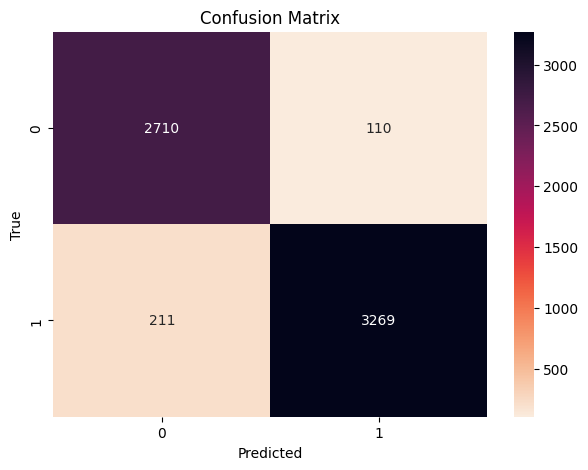

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the confusion matrix to a NumPy array
confusion_matrix_np = confusion_matrix.numpy()

# Create a heatmap for the confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix_np, annot=True, fmt='g', cmap='rocket_r', 
            xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [20]:
torch.save(model, r'C:\Users\Vansh\Desktop\projects\Maverick\Wild fire\wf_densenet169.pth')

In [18]:
import re

def parse_training_output(sample_text):
    # Extracting relevant information using regular expressions
    train_loss = [float(match.group(1)) for match in re.finditer(r'Epoch \d+/\d+, Loss: ([\d.]+), Acc:', sample_text)]
    
    # Extracting only the first occurrence of accuracy for each epoch
    train_acc = [float(match.group(1)) for match in re.finditer(r'Acc: ([\d.]+)%', sample_text)][::2]
    
    val_loss = [float(match.group(1)) for match in re.finditer(r'Val Loss: ([\d.]+)', sample_text)]
    val_acc = [float(match.group(1)) for match in re.finditer(r'Val Acc: ([\d.]+)%', sample_text)]
    precision = [float(match.group(1)) for match in re.finditer(r'Precision: ([\d.]+)', sample_text)]
    recall = [float(match.group(1)) for match in re.finditer(r'Recall: ([\d.]+)', sample_text)]
    f1_score = [float(match.group(1)) for match in re.finditer(r'F1 Score: ([\d.]+)', sample_text)]

    # Creating the dictionary
    data = {
        'Epoch': [i for i in range(1,21)],
        'Train_Loss': train_loss,
        'Train_Acc': train_acc,
        'Val_Loss': val_loss,
        'Val_Acc': val_acc,
        'Precision': precision,
        'Recall': recall,
        'F1_Score': f1_score
    }

    return data

# Sample text
sample_text = """
Epoch 1/20: 100%|██████████| 1891/1891 [02:10<00:00, 14.50it/s]
Epoch 1/20: 100%|██████████| 394/394 [00:23<00:00, 16.76it/s]
Epoch 1/20, Loss: 0.2842, Acc: 89.47%, Val Loss: 0.1693, Val Acc: 94.02%
Precision: 0.9401, Recall: 0.9402, F1 Score: 0.9401
Epoch 2/20: 100%|██████████| 1891/1891 [02:19<00:00, 13.53it/s]
Epoch 2/20: 100%|██████████| 394/394 [00:25<00:00, 15.56it/s]
Epoch 2/20, Loss: 0.2126, Acc: 91.98%, Val Loss: 0.1529, Val Acc: 94.70%
Precision: 0.9472, Recall: 0.9470, F1 Score: 0.9470
Epoch 3/20: 100%|██████████| 1891/1891 [02:14<00:00, 14.10it/s]
Epoch 3/20: 100%|██████████| 394/394 [00:23<00:00, 16.43it/s]
Epoch 3/20, Loss: 0.1966, Acc: 92.57%, Val Loss: 0.1413, Val Acc: 94.83%
Precision: 0.9482, Recall: 0.9483, F1 Score: 0.9482
Epoch 4/20: 100%|██████████| 1891/1891 [02:19<00:00, 13.52it/s]
Epoch 4/20: 100%|██████████| 394/394 [00:22<00:00, 17.20it/s]
Epoch 4/20, Loss: 0.1917, Acc: 92.72%, Val Loss: 0.1505, Val Acc: 94.65%
Precision: 0.9474, Recall: 0.9465, F1 Score: 0.9466
Epoch 5/20: 100%|██████████| 1891/1891 [02:14<00:00, 14.03it/s]
Epoch 5/20: 100%|██████████| 394/394 [00:25<00:00, 15.76it/s]
Epoch 5/20, Loss: 0.1821, Acc: 93.15%, Val Loss: 0.1371, Val Acc: 94.90%
Precision: 0.9492, Recall: 0.9490, F1 Score: 0.9490
Epoch 6/20: 100%|██████████| 1891/1891 [02:13<00:00, 14.13it/s]
Epoch 6/20: 100%|██████████| 394/394 [00:25<00:00, 15.48it/s]
Epoch 6/20, Loss: 0.1807, Acc: 93.10%, Val Loss: 0.1319, Val Acc: 94.92%
Precision: 0.9492, Recall: 0.9492, F1 Score: 0.9492
Epoch 7/20: 100%|██████████| 1891/1891 [02:11<00:00, 14.37it/s]
Epoch 7/20: 100%|██████████| 394/394 [00:26<00:00, 15.15it/s]
Epoch 7/20, Loss: 0.1829, Acc: 92.95%, Val Loss: 0.1296, Val Acc: 95.19%
Precision: 0.9519, Recall: 0.9519, F1 Score: 0.9519
Epoch 8/20: 100%|██████████| 1891/1891 [02:13<00:00, 14.17it/s]
Epoch 8/20: 100%|██████████| 394/394 [00:22<00:00, 17.22it/s]
Epoch 8/20, Loss: 0.1790, Acc: 93.14%, Val Loss: 0.1269, Val Acc: 95.22%
Precision: 0.9522, Recall: 0.9522, F1 Score: 0.9522
Epoch 9/20: 100%|██████████| 1891/1891 [02:14<00:00, 14.09it/s]
Epoch 9/20: 100%|██████████| 394/394 [00:22<00:00, 17.48it/s]
Epoch 9/20, Loss: 0.1737, Acc: 93.23%, Val Loss: 0.1263, Val Acc: 95.32%
Precision: 0.9533, Recall: 0.9532, F1 Score: 0.9532
Epoch 10/20: 100%|██████████| 1891/1891 [02:13<00:00, 14.18it/s]
Epoch 10/20: 100%|██████████| 394/394 [00:23<00:00, 17.00it/s]
Epoch 10/20, Loss: 0.1738, Acc: 93.28%, Val Loss: 0.1368, Val Acc: 95.03%
Precision: 0.9507, Recall: 0.9503, F1 Score: 0.9504
Epoch 11/20: 100%|██████████| 1891/1891 [02:13<00:00, 14.19it/s]
Epoch 11/20: 100%|██████████| 394/394 [00:23<00:00, 17.03it/s]
Epoch 11/20, Loss: 0.1715, Acc: 93.35%, Val Loss: 0.1346, Val Acc: 95.10%
Precision: 0.9513, Recall: 0.9510, F1 Score: 0.9510
Epoch 12/20: 100%|██████████| 1891/1891 [02:13<00:00, 14.18it/s]
Epoch 12/20: 100%|██████████| 394/394 [00:25<00:00, 15.27it/s]
Epoch 12/20, Loss: 0.1741, Acc: 93.31%, Val Loss: 0.1279, Val Acc: 95.21%
Precision: 0.9524, Recall: 0.9521, F1 Score: 0.9521
Epoch 13/20: 100%|██████████| 1891/1891 [02:14<00:00, 14.07it/s]
Epoch 13/20: 100%|██████████| 394/394 [00:22<00:00, 17.18it/s]
Epoch 13/20, Loss: 0.1755, Acc: 93.37%, Val Loss: 0.1461, Val Acc: 94.71%
Precision: 0.9483, Recall: 0.9471, F1 Score: 0.9472
Epoch 14/20: 100%|██████████| 1891/1891 [02:12<00:00, 14.25it/s]
Epoch 14/20: 100%|██████████| 394/394 [00:25<00:00, 15.36it/s]
Epoch 14/20, Loss: 0.1701, Acc: 93.45%, Val Loss: 0.1433, Val Acc: 94.57%
Precision: 0.9457, Recall: 0.9457, F1 Score: 0.9457
Epoch 15/20: 100%|██████████| 1891/1891 [02:13<00:00, 14.12it/s]
Epoch 15/20: 100%|██████████| 394/394 [00:22<00:00, 17.53it/s]
Epoch 15/20, Loss: 0.1675, Acc: 93.74%, Val Loss: 0.1248, Val Acc: 95.10%
Precision: 0.9510, Recall: 0.9510, F1 Score: 0.9509
Epoch 16/20: 100%|██████████| 1891/1891 [02:13<00:00, 14.12it/s]
Epoch 16/20: 100%|██████████| 394/394 [00:23<00:00, 17.02it/s]
Epoch 16/20, Loss: 0.1705, Acc: 93.46%, Val Loss: 0.1290, Val Acc: 95.19%
Precision: 0.9520, Recall: 0.9519, F1 Score: 0.9519
Epoch 17/20: 100%|██████████| 1891/1891 [02:12<00:00, 14.30it/s]
Epoch 17/20: 100%|██████████| 394/394 [00:25<00:00, 15.23it/s]
Epoch 17/20, Loss: 0.1698, Acc: 93.51%, Val Loss: 0.1286, Val Acc: 95.10%
Precision: 0.9510, Recall: 0.9510, F1 Score: 0.9510
Epoch 18/20: 100%|██████████| 1891/1891 [02:10<00:00, 14.48it/s]
Epoch 18/20: 100%|██████████| 394/394 [00:22<00:00, 17.40it/s]
Epoch 18/20, Loss: 0.1713, Acc: 93.52%, Val Loss: 0.1251, Val Acc: 95.14%
Precision: 0.9514, Recall: 0.9514, F1 Score: 0.9514
Epoch 19/20: 100%|██████████| 1891/1891 [02:13<00:00, 14.21it/s]
Epoch 19/20: 100%|██████████| 394/394 [00:25<00:00, 15.23it/s]
Epoch 19/20, Loss: 0.1675, Acc: 93.56%, Val Loss: 0.1319, Val Acc: 95.06%
Precision: 0.9510, Recall: 0.9506, F1 Score: 0.9507
Epoch 20/20: 100%|██████████| 1891/1891 [02:12<00:00, 14.25it/s]
Epoch 20/20: 100%|██████████| 394/394 [00:22<00:00, 17.28it/s]
Epoch 20/20, Loss: 0.1746, Acc: 93.31%, Val Loss: 0.1387, Val Acc: 94.90%
Precision: 0.9497, Recall: 0.9490, F1 Score: 0.9491


"""

# Calling the function
parsed_data = parse_training_output(sample_text)
# Displaying the result
print(parsed_data)

{'Epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'Train_Loss': [0.2842, 0.2126, 0.1966, 0.1917, 0.1821, 0.1807, 0.1829, 0.179, 0.1737, 0.1738, 0.1715, 0.1741, 0.1755, 0.1701, 0.1675, 0.1705, 0.1698, 0.1713, 0.1675, 0.1746], 'Train_Acc': [89.47, 91.98, 92.57, 92.72, 93.15, 93.1, 92.95, 93.14, 93.23, 93.28, 93.35, 93.31, 93.37, 93.45, 93.74, 93.46, 93.51, 93.52, 93.56, 93.31], 'Val_Loss': [0.1693, 0.1529, 0.1413, 0.1505, 0.1371, 0.1319, 0.1296, 0.1269, 0.1263, 0.1368, 0.1346, 0.1279, 0.1461, 0.1433, 0.1248, 0.129, 0.1286, 0.1251, 0.1319, 0.1387], 'Val_Acc': [94.02, 94.7, 94.83, 94.65, 94.9, 94.92, 95.19, 95.22, 95.32, 95.03, 95.1, 95.21, 94.71, 94.57, 95.1, 95.19, 95.1, 95.14, 95.06, 94.9], 'Precision': [0.9401, 0.9472, 0.9482, 0.9474, 0.9492, 0.9492, 0.9519, 0.9522, 0.9533, 0.9507, 0.9513, 0.9524, 0.9483, 0.9457, 0.951, 0.952, 0.951, 0.9514, 0.951, 0.9497], 'Recall': [0.9402, 0.947, 0.9483, 0.9465, 0.949, 0.9492, 0.9519, 0.9522, 0.9532, 0.9503, 0.951, 0

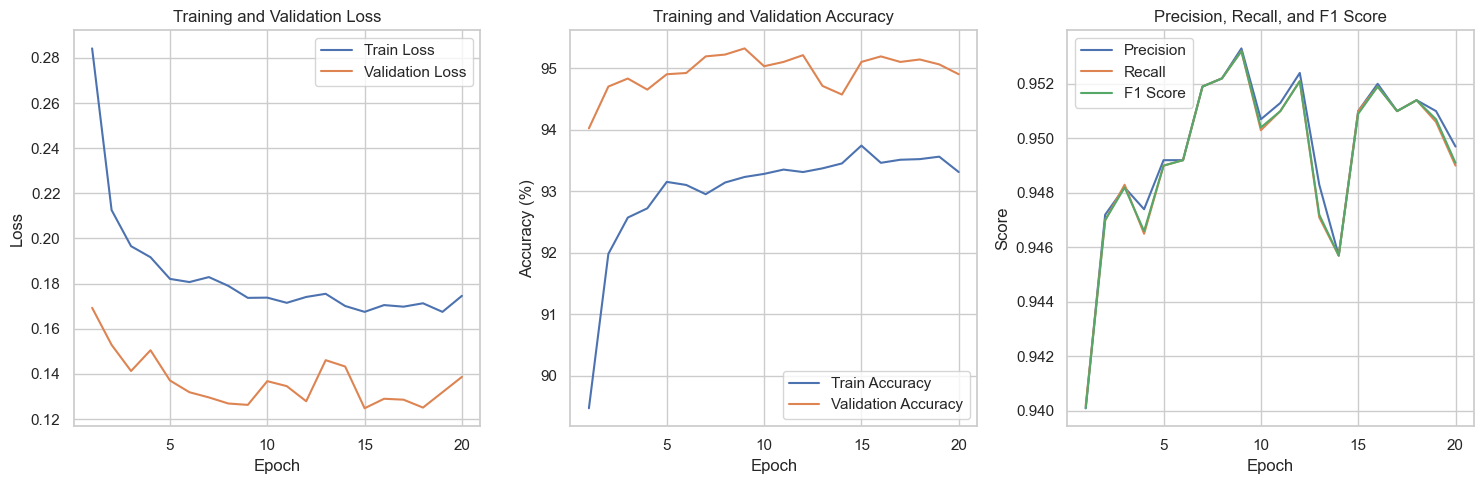

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

##################################################################################################


##################################################################################################

# Convert data to a Pandas DataFrame
df = pd.DataFrame(parsed_data)

# Set the style of Seaborn
sns.set(style="whitegrid")

# Create a horizontal line subplot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotting the training and validation loss
sns.lineplot(x='Epoch', y='Train_Loss', data=df, label='Train Loss', ax=axes[0])
sns.lineplot(x='Epoch', y='Val_Loss', data=df, label='Validation Loss', ax=axes[0])
axes[0].set_title('Training and Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')

# Plotting the training and validation accuracy
sns.lineplot(x='Epoch', y='Train_Acc', data=df, label='Train Accuracy', ax=axes[1])
sns.lineplot(x='Epoch', y='Val_Acc', data=df, label='Validation Accuracy', ax=axes[1])
axes[1].set_title('Training and Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy (%)')

# Plotting the precision, recall, and F1 score
sns.lineplot(x='Epoch', y='Precision', data=df, label='Precision', ax=axes[2])
sns.lineplot(x='Epoch', y='Recall', data=df, label='Recall', ax=axes[2])
sns.lineplot(x='Epoch', y='F1_Score', data=df, label='F1 Score', ax=axes[2])
axes[2].set_title('Precision, Recall, and F1 Score')
axes[2].set_xlabel('Epoch')
axes[2].set_ylabel('Score')

plt.tight_layout()
#plt.savefig(r'D:\ADNI\model_inferences\EFFICIENTNET_B0_lion_64_lr.png',dpi=300)
plt.show()